# Titanic Disaster (Part II) - Predictive Analysis

## Modelling

For this predictive analysis, we'll be using one the Scikit-Learn Ensemble models, namely the <b>Random Forest Classifier</b> to predict passengers' survival rate in the Titanic dataset.

Here is an overview of each step involved:

1. Data Preparation
3. Data Preprocessing
4. Fit Model to Data
5. Hyperparameters Tuning
6. Make Predictions
7. Evaluation
    * `Cross Validation`
    * `ROC Curve` and `AUC Score`
    * `Confusion Matrix`
    * `Classification Report`
8. Feature Importances
9. Saving and Exporting model

## 1. Data Preparation

#### Importing Tools and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df_train = pd.read_csv('Data/train_data.csv')
df_test = pd.read_csv('Data/test_data.csv')
val = pd.read_csv('Data/gender_submission.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
val.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
# Removing unnecessary columns
columns_to_remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']

df_train = df_train.drop(columns=columns_to_remove)
df_test = df_test.drop(columns=columns_to_remove)

In [7]:
# Checking missing values for train and test sets
df_train.isna().sum(), df_test.isna().sum()

(Survived      0
 Pclass        0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Fare          0
 Embarked      2
 dtype: int64,
 Pclass       0
 Sex          0
 Age         86
 SibSp        0
 Parch        0
 Fare         1
 Embarked     0
 dtype: int64)

In [8]:
# Handling missing values using Scikit-Learn SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Setup imputers with strategies
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

# Impute missing numerical values
df_train[['Age', 'Fare']] = num_imputer.fit_transform(df_train[['Age', 'Fare']])
df_test[['Age', 'Fare']] = num_imputer.transform(df_test[['Age', 'Fare']])

# Impute missing categorical values
df_train[['Embarked']] = cat_imputer.fit_transform(df_train[['Embarked']])

In [9]:
df_train.isna().sum(), df_test.isna().sum()

(Survived    0
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Embarked    0
 dtype: int64,
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Embarked    0
 dtype: int64)

## 2. Data Preprocessing

In [10]:
# Splitting train data into features and labels
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

In [11]:
# Features encoding
from sklearn.preprocessing import OneHotEncoder

cat_features = ['Pclass', 'Sex', 'Embarked']

one_hot = OneHotEncoder()

enc_transformer = ColumnTransformer([
    ('one_hot', one_hot, cat_features)
], remainder='passthrough')

train_data_encoded = enc_transformer.fit_transform(X_train)
test_data_encoded = enc_transformer.transform(df_test)

In [12]:
train_data_encoded[:5], test_data_encoded[:5]

(array([[ 0.    ,  0.    ,  1.    ,  0.    ,  1.    ,  0.    ,  0.    ,
          1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
        [ 1.    ,  0.    ,  0.    ,  1.    ,  0.    ,  1.    ,  0.    ,
          0.    , 38.    ,  1.    ,  0.    , 71.2833],
        [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    ,  0.    ,  0.    ,
          1.    , 26.    ,  0.    ,  0.    ,  7.925 ],
        [ 1.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  0.    ,
          1.    , 35.    ,  1.    ,  0.    , 53.1   ],
        [ 0.    ,  0.    ,  1.    ,  0.    ,  1.    ,  0.    ,  0.    ,
          1.    , 35.    ,  0.    ,  0.    ,  8.05  ]]),
 array([[ 0.    ,  0.    ,  1.    ,  0.    ,  1.    ,  0.    ,  1.    ,
          0.    , 34.5   ,  0.    ,  0.    ,  7.8292],
        [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    ,  0.    ,  0.    ,
          1.    , 47.    ,  1.    ,  0.    ,  7.    ],
        [ 0.    ,  1.    ,  0.    ,  0.    ,  1.    ,  0.    ,  1.    ,
          0.    , 62.    ,  0.    ,  

## 3. Fit Model to Data

In [13]:
# fitting model to train data
from sklearn.ensemble import RandomForestClassifier

# Setting static seed (for reproduceability)
np.random.seed(21)

clf = RandomForestClassifier().fit(train_data_encoded, y_train)

In [14]:
# Making a copy of the test data
X_test = test_data_encoded.copy()

In [15]:
# Getting the true labels in the correct format
true_labels = np.array(val['Survived'])

In [16]:
# Calculating the model's performance
acc_score = clf.score(X_test, true_labels)

acc_score

0.8229665071770335

## 4. Hyperparameters Tuning

In [17]:
# Using GridSearchCV()
from sklearn.model_selection import GridSearchCV

# Creating a paramaters grid
params_grid = {'n_estimators': [100, 200, 300],
               'max_depth': [None, 10, 20, 30],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'max_features': [None, 'sqrt', 'log2']}

# Instantiating a GridSearchCV
gs_rf = GridSearchCV(estimator=clf,
                     param_grid=params_grid,
                     cv=5,
                     scoring='accuracy',
                     n_jobs=-1)

# Fitting GridSearchCV to data
gs_rf.fit(train_data_encoded, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [18]:
# Checking best params and best score
gs_rf.best_params_, gs_rf.best_score_

({'max_depth': 30,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 200},
 0.8406691356474798)

Our tuned model saw an increase of approx. `2%` in accuracy score. But there's more room to improve.

## 5. Make Predictions

In [19]:
# Making predictions
y_preds = gs_rf.predict(X_test)

y_preds[:5]

array([0, 0, 0, 0, 1], dtype=int64)

## 6. Evaluation

> ### `Cross Validation`

In [20]:
from sklearn.model_selection import cross_val_score

val_score = cross_val_score(gs_rf, train_data_encoded, y_train)

val_score

array([0.79888268, 0.81460674, 0.88202247, 0.82022472, 0.84831461])

In [21]:
avg_val_score = np.mean(val_score)

avg_val_score

0.8328102441780176

In [22]:
print(f'\nAccuracy score: {gs_rf.best_score_*100:.2f}% \nCross-Validation score: {avg_val_score*100:.2f}%\n')


Accuracy score: 84.07% 
Cross-Validation score: 83.28%



The baseline Random Forest Classifier yields an accuracy score of approx. `84%`.

The model performs at an average cross-validated accuracy score of approx `83.2%` across 5 folds. 

This demonstrates the model's effectiveness across different subsets of the data, confirming its stability and reliability in predicting the survival rate of passengers in the Titanic dataset.

> ### `ROC Curve` and `AUC Score`

In [23]:
# Making predictions with predict_proba() to get prediction probabilities
y_preds_proba = gs_rf.predict_proba(X_test)

y_preds_proba[:10]

array([[0.89651406, 0.10348594],
       [0.69059863, 0.30940137],
       [0.73093348, 0.26906652],
       [0.62853137, 0.37146863],
       [0.49055737, 0.50944263],
       [0.85050071, 0.14949929],
       [0.77296131, 0.22703869],
       [0.87504037, 0.12495963],
       [0.20236188, 0.79763812],
       [0.93549452, 0.06450548]])

In [24]:
# Getting positive predicted values
y_preds_proba_positive = y_preds_proba[:, 1]

y_preds_proba_positive[:10]

array([0.10348594, 0.30940137, 0.26906652, 0.37146863, 0.50944263,
       0.14949929, 0.22703869, 0.12495963, 0.79763812, 0.06450548])

In [25]:
# Calculating FPR (False-Positive Rates), TPR (True-Positive Rates), and Thresholds
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(true_labels, y_preds_proba_positive)

In [26]:
fpr[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

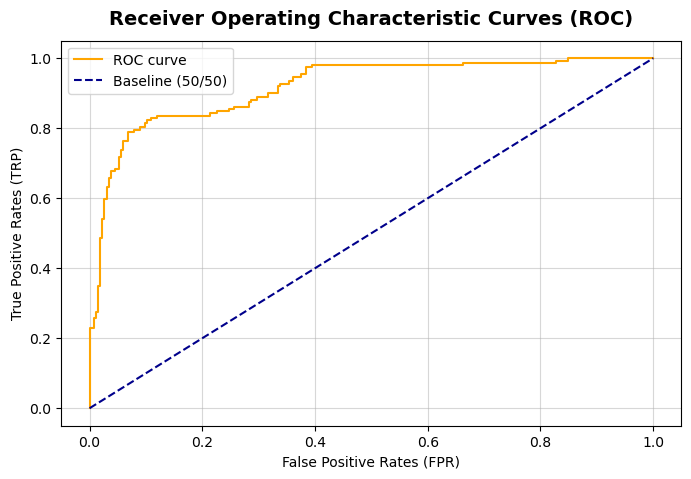

In [27]:
# Plot ROC curve
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr,
        tpr,
        color='orange',
        label='ROC curve')
ax.plot([0, 1],
        [0, 1],
        color='darkblue',
        linestyle='--',
        label='Baseline (50/50)')

ax.set_xlabel('False Positive Rates (FPR)')
ax.set_ylabel('True Positive Rates (TRP)')

ax.legend()
ax.grid(True,
        alpha=0.5)
ax.set_title('Receiver Operating Characteristic Curves (ROC)',
             fontsize=14,
             fontweight='bold',
             y=1.02);

In [28]:
# Calculating AUC (Area under Curve)
auc_score = roc_auc_score(true_labels, y_preds_proba_positive)

print(f'\nAUC score: {auc_score:.2f}\n')


AUC score: 0.92



The <b>ROC Curve</b> plot shows a high proportion of True Positive rates versus low False Positive rates with an <b>AUC score</b> of `0.92`, reflecting the model's strong performance and ability in distinguishing between the survivors and non-survivors classes. 

> ### `Confusion Matrix`

In [29]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_labels, y_preds)

conf_matrix

array([[248,  18],
       [ 33, 119]], dtype=int64)

In [30]:
pd.crosstab(true_labels, y_preds,
            rownames=['True labels'],
            colnames=['Predicted labels'])

Predicted labels,0,1
True labels,,
0,248,18
1,33,119


In [31]:
np.sum(conf_matrix[:])

418

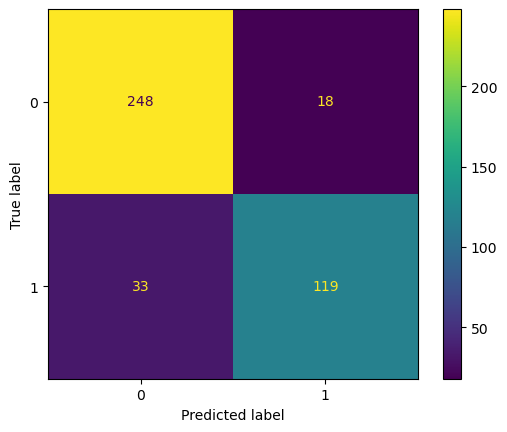

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(gs_rf, X_test, true_labels);

The <b>confusion matrix</b> further demonstrates the model's ability in correctly identifying the majority of the actual survivors and non-survivors, with relatively low misclassification rates, indicating good predictive performance.

> ### `Classification Report`

In [33]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       266
           1       0.87      0.78      0.82       152

    accuracy                           0.88       418
   macro avg       0.88      0.86      0.87       418
weighted avg       0.88      0.88      0.88       418



The <b>classification report</b> provides a comprehensive evaluation of the model's performance with regards to <u>data balance</u>.

Here, we see that the model performs much better in predicting non-survivors class than survivors, which can be attributed to class imbalance as shown by the data count for each class (support) — `266` non-survivors and `152` survivors. Despite this, the model still maintains good overall precision and recall across both classes, further demonstrating its robustness and effectivness in predicting passengers' survival rate.

## 6. Feature Importances

In [34]:
# Getting GridSearchCV best parameters
gs_rf.best_params_

{'max_depth': 30,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [35]:
# Instantiating a new model with best hyperparameters
gs_clf = RandomForestClassifier(max_depth=None,
                                max_features=None,
                                min_samples_leaf=4,
                                min_samples_split=10,
                                n_estimators= 300).fit(train_data_encoded, y_train)

# Calculating feature importances
gs_clf.feature_importances_

array([0.02311819, 0.002936  , 0.11052619, 0.19019956, 0.2326836 ,
       0.00827405, 0.00359655, 0.0139953 , 0.16540097, 0.04028894,
       0.00985686, 0.19912378])

In [36]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

We can see that the shape of the data doesn't match the original columns order. This is because of the categorical data encoding of the `Pclass`, `Sex` and `Embarked` features.

To correctly map the importances with the original features, we need to reconstruct these categorical columns. One way to do that, is to sum the importances for each of the categorical feature in <u>the correct order</u>.

It's important to note that the order of columns may have changed after data encoding and transformation. The reason being that `ColumnTransformer` function applies transformation in the <b>specified order</b> (`cat_features = ['Pclass', 'Sex', 'Embarked']`) and in <b>alphabetical order</b> of categories before appending the remaining features with `remainder='passthrough'`.

In [37]:
# Mapping importances to their corresponding (encoded) feature names.
encoded_feature_names = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
                         'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age', 'SibSp',
                         'Parch', 'Fare']

feature_importances = dict(zip(encoded_feature_names, gs_clf.feature_importances_))

feature_importances

{'Pclass_1': 0.023118189830588786,
 'Pclass_2': 0.0029360026066258147,
 'Pclass_3': 0.11052619269978273,
 'Sex_female': 0.1901995569103887,
 'Sex_male': 0.2326836011135389,
 'Embarked_C': 0.00827405419280283,
 'Embarked_Q': 0.0035965482579915393,
 'Embarked_S': 0.013995300907659299,
 'Age': 0.1654009706021546,
 'SibSp': 0.04028894188224738,
 'Parch': 0.009856860850458135,
 'Fare': 0.19912378014576135}

In [38]:
# Reconstructing categorical columns to their original format
reconstruced_features = {'Pclass': feature_importances['Pclass_1'] + feature_importances['Pclass_2'] + feature_importances['Pclass_3'],
                         'Sex': feature_importances['Sex_female'] + feature_importances['Sex_male'],
                         'Embarked': feature_importances['Embarked_C'] + feature_importances['Embarked_Q'] + feature_importances['Embarked_S'],
                         'Age': feature_importances['Age'],
                         'SibSp': feature_importances['SibSp'],
                         'Parch': feature_importances['Parch'],
                         'Fare': feature_importances['Fare']}

df_coeff = pd.DataFrame(reconstruced_features,
                        index=['Importance']).T

df_coeff

,Importance
Pclass,0.136580
Sex,0.422883
Embarked,0.025866
Age,0.165401
SibSp,0.040289
Parch,0.009857
Fare,0.199124


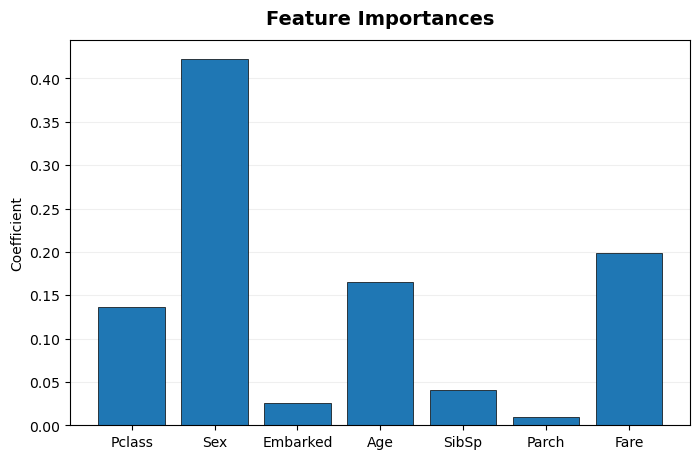

In [39]:
# Visualizing feature importances
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(df_coeff.index,
       df_coeff['Importance'],
       edgecolor='black',
       linewidth=0.5)

ax.yaxis.grid(True,
              alpha=0.2)
ax.set_axisbelow(True)

ax.set_ylabel('Coefficient')

ax.set_title('Feature Importances',
             y=1.02,
             fontsize=14,
             fontweight='bold');

The plot demonstrates the <b>feature importances</b> as determined by our Random Forest Classifier model, which highlights the coefficient of each feature in the data as well as its contribution to predicting the target labels.

* We can see that `Sex` (gender) is by far the most significant predictor of survivability, where — as we saw in our data exploration, male passengers have a much higher chance to perish than females.
* `Fare` is the second most important factor contributing to higher survability rates. As we've seen in our data exploration, high paid fares are associated with higher class passengers (`Pclass`) who have the lowest casulaty rate compared to middle and lower class passengers. 
* Lastly, `Age` is the third most important factor of survivability, which may suggest that certain age group, particularily children are more likely to survive than other groups.

## 7. Saving & Exporting Model

In [40]:
import pickle

pickle.dump(clf, open('baseline_titanic_casualty_model.pkl', 'wb'))